In [2]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from collections import Counter, defaultdict
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler

%matplotlib inline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

import collections
%config IPCompleter.greedy=True
%config Completer.use_jedi=False

In [36]:
train_df = pd.read_csv('train.csv')

In [37]:
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [38]:
sub_df = pd.read_csv('test.csv')

In [39]:
train_df.fillna('NA', inplace = True)

In [40]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

labelgen = LabelEncoder()
labelreg = LabelEncoder()
labelocc = LabelEncoder()
labelcha = LabelEncoder()
labelcpr = LabelEncoder()
labelisa = LabelEncoder()
labelii = LabelEncoder()


train_df.Gender=labelgen.fit_transform(train_df.Gender)
train_df.Region_Code=labelreg.fit_transform(train_df.Region_Code)
train_df.Occupation=labelocc.fit_transform(train_df.Occupation)
train_df.Channel_Code=labelcha.fit_transform(train_df.Channel_Code)
train_df.Credit_Product=labelcpr.fit_transform(train_df.Credit_Product)
train_df.Is_Active=labelisa.fit_transform(train_df.Is_Active)
#train_df.Region_Code_1=labelii.fit_transform(train_df.Region_Code_1)

In [41]:
Y = train_df["Is_Lead"]
X = train_df.drop(['Is_Lead'],axis = 1)

In [42]:
X['data'] = 'Train'

In [43]:
test_df = sub_df

In [44]:
test_df.fillna('NA', inplace = True)

In [45]:
test_df.Gender=labelgen.transform(test_df.Gender)
test_df.Region_Code=labelreg.transform(test_df.Region_Code)
test_df.Occupation=labelocc.transform(test_df.Occupation)
test_df.Channel_Code=labelcha.transform(test_df.Channel_Code)
test_df.Credit_Product=labelcpr.transform(test_df.Credit_Product)
test_df.Is_Active=labelisa.transform(test_df.Is_Active)

In [46]:
test_df['data'] = 'Test'

In [47]:
X_com = pd.concat([X, test_df], axis=0)

In [48]:
X_com.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,data
105307,DBENJOYI,1,52,18,2,1,86,2,4242558,1,Test
105308,CWQ72DWS,1,55,27,1,1,86,2,1159153,0,Test
105309,HDESC8GU,1,35,4,2,3,15,1,1703727,0,Test
105310,2PW4SFCA,1,53,4,1,2,93,1,737178,1,Test
105311,F2NOYPPZ,1,27,6,2,0,21,1,591565,0,Test


In [49]:
X_com['AAC'] = X_com.groupby(['Channel_Code'])['Avg_Account_Balance'].transform('sum')/X_com.groupby(['Channel_Code'])['Avg_Account_Balance'].transform('count')
#X_com['AAVC'] = X_com.groupby(['Channel_Code'])['AAV'].transform('sum')/X_com.groupby(['Channel_Code'])['AAV'].transform('count')
X_com['VC'] = X_com.groupby(['Channel_Code'])['Vintage'].transform('sum')/X_com.groupby(['Channel_Code'])['Vintage'].transform('count')
X_com['AC'] = X_com.groupby(['Channel_Code'])['Age'].transform('sum')/X_com.groupby(['Channel_Code'])['Age'].transform('count')
X_com['RC'] = X_com.groupby(['Region_Code','Channel_Code'])['ID'].transform('count')
X_com['OC'] = X_com.groupby(['Occupation','Channel_Code'])['ID'].transform('count')
X_com['CC'] = X_com.groupby(['Credit_Product','Channel_Code'])['ID'].transform('count')
X_com['GC'] = X_com.groupby(['Gender','Channel_Code'])['ID'].transform('count')
X_com['IC'] = X_com.groupby(['Is_Active','Channel_Code'])['ID'].transform('count')

In [51]:
X_com['Region'] = X_com.groupby(['Region_Code'])['ID'].transform('count')

from sklearn.preprocessing import KBinsDiscretizer
esta = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
esta.fit(X_com['Region'].values.reshape(-1,1))
X_com['Region_quantiles'] = esta.transform(X_com['Region'].values.reshape(-1,1)).astype(int)

In [50]:
X_com['AAO'] = X_com.groupby(['Occupation'])['Avg_Account_Balance'].transform('sum')/X_com.groupby(['Occupation'])['Avg_Account_Balance'].transform('count')
X_com['VO'] = X_com.groupby(['Occupation'])['Vintage'].transform('sum')/X_com.groupby(['Occupation'])['Vintage'].transform('count')
X_com['AO)'] = X_com.groupby(['Occupation'])['Age'].transform('sum')/X_com.groupby(['Occupation'])['Age'].transform('count')
X_com['OR'] = X_com.groupby(['Occupation','Region_Code'])['ID'].transform('count')
X_com['CO'] = X_com.groupby(['Credit_Product','Occupation'])['ID'].transform('count')
X_com['GO'] = X_com.groupby(['Gender','Occupation'])['ID'].transform('count')
X_com['IO'] = X_com.groupby(['Is_Active','Occupation'])['ID'].transform('count')

In [52]:
X_com = X_com.drop(['ID'],axis = 1)

In [53]:
test_df.shape, X.shape

((105312, 11), (245725, 11))

In [54]:
#rslt_df = dataframe.loc[dataframe['Percentage'] > 80]

X_train = X_com.loc[X_com['data'] == 'Train']
X_test= X_com.loc[X_com['data'] == 'Test']
X_test.shape, X_train.shape

((105312, 27), (245725, 27))

In [55]:
X_test = X_test.drop(['data'],axis = 1)
X_train = X_train.drop(['data'],axis = 1)

from sklearn.preprocessing import OneHotEncoder

cat_features = X.select_dtypes(include='object').columns.tolist()
train_cat = X[cat_features] 
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
cat_encode = pd.DataFrame(onehot_encoder.fit_transform(train_cat))

feature_encode = onehot_encoder.get_feature_names(cat_features)
cat_encode.columns = feature_encode

from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot

num_features = ['Age', 'Vintage', 'Avg_Account_Balance']
train_num = X[num_features]

scaler = MinMaxScaler(feature_range=(1, 2))
scaled_array=scaler.fit_transform(X_train)
ScaledX_Train = pd.DataFrame(scaled_array,columns=X_train.columns)

# perform a box-cox transform of the dataset
pt = PowerTransformer(method='box-cox')
data = pt.fit_transform(ScaledX_Train)
# convert the array back to a dataframe
ScaledX_pt = DataFrame(data,columns=ScaledX_Train.columns)



X_enc = pd.concat([ScaledX_pt, cat_encode], axis=1)

import lightgbm as lgb
from sklearn.metrics import roc_auc_score

params = {'n_estimators': 1200,'max_depth': 8, 'n_jobs': -1,'num_leaves': 200, 'random_state': 101, 'learning_rate': 0.01, 'colsample_bytree': 0.5}

model = lgb.LGBMClassifier(**params)


from xgboost import XGBClassifier

XG_model_X1 = XGBClassifier( n_estimators=300, max_depth=9,verbose =1,learning_rate = 0.01, 
                        random_state=101)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               245725 non-null  int64  
 1   Age                  245725 non-null  int64  
 2   Region_Code          245725 non-null  int64  
 3   Occupation           245725 non-null  int64  
 4   Channel_Code         245725 non-null  int64  
 5   Vintage              245725 non-null  int64  
 6   Credit_Product       245725 non-null  int64  
 7   Avg_Account_Balance  245725 non-null  int64  
 8   Is_Active            245725 non-null  int64  
 9   AAC                  245725 non-null  float64
 10  VC                   245725 non-null  float64
 11  AC                   245725 non-null  float64
 12  RC                   245725 non-null  int64  
 13  OC                   245725 non-null  int64  
 14  CC                   245725 non-null  int64  
 15  GC               

In [56]:
from catboost import CatBoostClassifier

cat_params = {'n_estimators': 1200,
              'depth': 9,
              'learning_rate': 0.01,
              'colsample_bylevel': 0.655,
              'bagging_temperature': 0.921,
              'l2_leaf_reg': 10.133, 'loss_function': 'Logloss',
              'eval_metric': 'AUC'}

cat_model = CatBoostClassifier(**cat_params)

clf = RandomForestClassifier(
    n_estimators=1200,
    criterion='gini',
    max_depth=9,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    class_weight='balanced'
)

In [57]:
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right")
    plt.show()
    return (f, ax)

def compute_roc_auc(index):
    y_predict = cat_model.predict_proba(X_train.iloc[index])[:,1]
    fpr, tpr, thresholds = roc_curve(Y.iloc[index], y_predict)
    auc_score = auc(fpr, tpr)
    return fpr, tpr, auc_score

0:	total: 146ms	remaining: 2m 55s
1:	total: 378ms	remaining: 3m 46s
2:	total: 594ms	remaining: 3m 56s
3:	total: 843ms	remaining: 4m 11s
4:	total: 1.08s	remaining: 4m 18s
5:	total: 1.25s	remaining: 4m 9s
6:	total: 1.38s	remaining: 3m 55s
7:	total: 1.66s	remaining: 4m 6s
8:	total: 1.81s	remaining: 4m
9:	total: 1.95s	remaining: 3m 51s
10:	total: 2.1s	remaining: 3m 47s
11:	total: 2.29s	remaining: 3m 47s
12:	total: 2.39s	remaining: 3m 38s
13:	total: 2.49s	remaining: 3m 31s
14:	total: 2.74s	remaining: 3m 36s
15:	total: 3s	remaining: 3m 42s
16:	total: 3.29s	remaining: 3m 49s
17:	total: 3.41s	remaining: 3m 44s
18:	total: 3.52s	remaining: 3m 38s
19:	total: 3.74s	remaining: 3m 40s
20:	total: 3.87s	remaining: 3m 37s
21:	total: 3.96s	remaining: 3m 31s
22:	total: 4.25s	remaining: 3m 37s
23:	total: 4.41s	remaining: 3m 36s
24:	total: 4.66s	remaining: 3m 39s
25:	total: 4.79s	remaining: 3m 36s
26:	total: 4.91s	remaining: 3m 33s
27:	total: 5.01s	remaining: 3m 29s
28:	total: 5.13s	remaining: 3m 27s
29:	t

234:	total: 34.1s	remaining: 2m 20s
235:	total: 34.4s	remaining: 2m 20s
236:	total: 34.5s	remaining: 2m 20s
237:	total: 34.6s	remaining: 2m 19s
238:	total: 34.8s	remaining: 2m 19s
239:	total: 34.9s	remaining: 2m 19s
240:	total: 35s	remaining: 2m 19s
241:	total: 35.2s	remaining: 2m 19s
242:	total: 35.4s	remaining: 2m 19s
243:	total: 35.6s	remaining: 2m 19s
244:	total: 36s	remaining: 2m 20s
245:	total: 36.7s	remaining: 2m 22s
246:	total: 37.1s	remaining: 2m 23s
247:	total: 37.9s	remaining: 2m 25s
248:	total: 39.2s	remaining: 2m 29s
249:	total: 39.8s	remaining: 2m 31s
250:	total: 40.3s	remaining: 2m 32s
251:	total: 40.6s	remaining: 2m 32s
252:	total: 41s	remaining: 2m 33s
253:	total: 41.1s	remaining: 2m 33s
254:	total: 41.3s	remaining: 2m 32s
255:	total: 41.4s	remaining: 2m 32s
256:	total: 41.7s	remaining: 2m 32s
257:	total: 41.8s	remaining: 2m 32s
258:	total: 42.5s	remaining: 2m 34s
259:	total: 42.8s	remaining: 2m 34s
260:	total: 43s	remaining: 2m 34s
261:	total: 43.4s	remaining: 2m 35s


466:	total: 1m 14s	remaining: 1m 57s
467:	total: 1m 14s	remaining: 1m 57s
468:	total: 1m 15s	remaining: 1m 57s
469:	total: 1m 15s	remaining: 1m 56s
470:	total: 1m 15s	remaining: 1m 56s
471:	total: 1m 15s	remaining: 1m 56s
472:	total: 1m 15s	remaining: 1m 56s
473:	total: 1m 15s	remaining: 1m 55s
474:	total: 1m 15s	remaining: 1m 55s
475:	total: 1m 15s	remaining: 1m 55s
476:	total: 1m 15s	remaining: 1m 55s
477:	total: 1m 16s	remaining: 1m 54s
478:	total: 1m 16s	remaining: 1m 54s
479:	total: 1m 16s	remaining: 1m 54s
480:	total: 1m 16s	remaining: 1m 54s
481:	total: 1m 16s	remaining: 1m 54s
482:	total: 1m 16s	remaining: 1m 53s
483:	total: 1m 16s	remaining: 1m 53s
484:	total: 1m 16s	remaining: 1m 53s
485:	total: 1m 17s	remaining: 1m 53s
486:	total: 1m 17s	remaining: 1m 53s
487:	total: 1m 17s	remaining: 1m 52s
488:	total: 1m 17s	remaining: 1m 52s
489:	total: 1m 17s	remaining: 1m 52s
490:	total: 1m 17s	remaining: 1m 52s
491:	total: 1m 18s	remaining: 1m 52s
492:	total: 1m 18s	remaining: 1m 52s
4

690:	total: 1m 47s	remaining: 1m 18s
691:	total: 1m 47s	remaining: 1m 18s
692:	total: 1m 47s	remaining: 1m 18s
693:	total: 1m 47s	remaining: 1m 18s
694:	total: 1m 47s	remaining: 1m 18s
695:	total: 1m 47s	remaining: 1m 18s
696:	total: 1m 47s	remaining: 1m 17s
697:	total: 1m 47s	remaining: 1m 17s
698:	total: 1m 48s	remaining: 1m 17s
699:	total: 1m 48s	remaining: 1m 17s
700:	total: 1m 48s	remaining: 1m 17s
701:	total: 1m 48s	remaining: 1m 16s
702:	total: 1m 48s	remaining: 1m 16s
703:	total: 1m 48s	remaining: 1m 16s
704:	total: 1m 48s	remaining: 1m 16s
705:	total: 1m 48s	remaining: 1m 16s
706:	total: 1m 48s	remaining: 1m 15s
707:	total: 1m 49s	remaining: 1m 15s
708:	total: 1m 49s	remaining: 1m 15s
709:	total: 1m 49s	remaining: 1m 15s
710:	total: 1m 49s	remaining: 1m 15s
711:	total: 1m 49s	remaining: 1m 15s
712:	total: 1m 49s	remaining: 1m 14s
713:	total: 1m 49s	remaining: 1m 14s
714:	total: 1m 49s	remaining: 1m 14s
715:	total: 1m 49s	remaining: 1m 14s
716:	total: 1m 50s	remaining: 1m 14s
7

921:	total: 2m 15s	remaining: 40.8s
922:	total: 2m 15s	remaining: 40.7s
923:	total: 2m 15s	remaining: 40.5s
924:	total: 2m 15s	remaining: 40.4s
925:	total: 2m 16s	remaining: 40.2s
926:	total: 2m 16s	remaining: 40.1s
927:	total: 2m 16s	remaining: 40s
928:	total: 2m 16s	remaining: 39.8s
929:	total: 2m 16s	remaining: 39.7s
930:	total: 2m 16s	remaining: 39.5s
931:	total: 2m 16s	remaining: 39.4s
932:	total: 2m 17s	remaining: 39.2s
933:	total: 2m 17s	remaining: 39s
934:	total: 2m 17s	remaining: 38.9s
935:	total: 2m 17s	remaining: 38.8s
936:	total: 2m 17s	remaining: 38.7s
937:	total: 2m 17s	remaining: 38.5s
938:	total: 2m 18s	remaining: 38.4s
939:	total: 2m 18s	remaining: 38.2s
940:	total: 2m 18s	remaining: 38.1s
941:	total: 2m 18s	remaining: 38s
942:	total: 2m 19s	remaining: 37.9s
943:	total: 2m 19s	remaining: 37.8s
944:	total: 2m 19s	remaining: 37.6s
945:	total: 2m 19s	remaining: 37.6s
946:	total: 2m 20s	remaining: 37.5s
947:	total: 2m 20s	remaining: 37.4s
948:	total: 2m 20s	remaining: 37.3

1146:	total: 2m 44s	remaining: 7.58s
1147:	total: 2m 44s	remaining: 7.43s
1148:	total: 2m 44s	remaining: 7.29s
1149:	total: 2m 44s	remaining: 7.15s
1150:	total: 2m 44s	remaining: 7s
1151:	total: 2m 44s	remaining: 6.86s
1152:	total: 2m 44s	remaining: 6.71s
1153:	total: 2m 44s	remaining: 6.57s
1154:	total: 2m 44s	remaining: 6.42s
1155:	total: 2m 45s	remaining: 6.28s
1156:	total: 2m 45s	remaining: 6.14s
1157:	total: 2m 45s	remaining: 5.99s
1158:	total: 2m 45s	remaining: 5.85s
1159:	total: 2m 45s	remaining: 5.71s
1160:	total: 2m 45s	remaining: 5.56s
1161:	total: 2m 45s	remaining: 5.42s
1162:	total: 2m 45s	remaining: 5.28s
1163:	total: 2m 45s	remaining: 5.13s
1164:	total: 2m 46s	remaining: 4.99s
1165:	total: 2m 46s	remaining: 4.85s
1166:	total: 2m 46s	remaining: 4.7s
1167:	total: 2m 46s	remaining: 4.56s
1168:	total: 2m 46s	remaining: 4.42s
1169:	total: 2m 46s	remaining: 4.27s
1170:	total: 2m 46s	remaining: 4.13s
1171:	total: 2m 46s	remaining: 3.99s
1172:	total: 2m 46s	remaining: 3.84s
1173:

180:	total: 24.9s	remaining: 2m 20s
181:	total: 25s	remaining: 2m 19s
182:	total: 25.1s	remaining: 2m 19s
183:	total: 25.2s	remaining: 2m 19s
184:	total: 25.3s	remaining: 2m 18s
185:	total: 25.4s	remaining: 2m 18s
186:	total: 25.5s	remaining: 2m 17s
187:	total: 25.6s	remaining: 2m 17s
188:	total: 25.8s	remaining: 2m 17s
189:	total: 25.9s	remaining: 2m 17s
190:	total: 26s	remaining: 2m 17s
191:	total: 26.2s	remaining: 2m 17s
192:	total: 26.3s	remaining: 2m 17s
193:	total: 26.4s	remaining: 2m 16s
194:	total: 26.5s	remaining: 2m 16s
195:	total: 26.6s	remaining: 2m 16s
196:	total: 26.8s	remaining: 2m 16s
197:	total: 27s	remaining: 2m 16s
198:	total: 27.1s	remaining: 2m 16s
199:	total: 27.2s	remaining: 2m 16s
200:	total: 27.3s	remaining: 2m 15s
201:	total: 27.4s	remaining: 2m 15s
202:	total: 27.5s	remaining: 2m 14s
203:	total: 27.6s	remaining: 2m 14s
204:	total: 27.7s	remaining: 2m 14s
205:	total: 27.8s	remaining: 2m 14s
206:	total: 27.8s	remaining: 2m 13s
207:	total: 28s	remaining: 2m 13s


413:	total: 55.1s	remaining: 1m 44s
414:	total: 55.2s	remaining: 1m 44s
415:	total: 55.3s	remaining: 1m 44s
416:	total: 55.5s	remaining: 1m 44s
417:	total: 55.6s	remaining: 1m 43s
418:	total: 55.7s	remaining: 1m 43s
419:	total: 55.8s	remaining: 1m 43s
420:	total: 55.9s	remaining: 1m 43s
421:	total: 56s	remaining: 1m 43s
422:	total: 56.1s	remaining: 1m 43s
423:	total: 56.2s	remaining: 1m 42s
424:	total: 56.3s	remaining: 1m 42s
425:	total: 56.4s	remaining: 1m 42s
426:	total: 56.5s	remaining: 1m 42s
427:	total: 56.7s	remaining: 1m 42s
428:	total: 56.8s	remaining: 1m 42s
429:	total: 56.9s	remaining: 1m 41s
430:	total: 57s	remaining: 1m 41s
431:	total: 57.1s	remaining: 1m 41s
432:	total: 57.2s	remaining: 1m 41s
433:	total: 57.3s	remaining: 1m 41s
434:	total: 57.4s	remaining: 1m 40s
435:	total: 57.5s	remaining: 1m 40s
436:	total: 57.6s	remaining: 1m 40s
437:	total: 57.7s	remaining: 1m 40s
438:	total: 57.8s	remaining: 1m 40s
439:	total: 57.9s	remaining: 1m 40s
440:	total: 58s	remaining: 1m 39

641:	total: 1m 20s	remaining: 1m 9s
642:	total: 1m 20s	remaining: 1m 9s
643:	total: 1m 20s	remaining: 1m 9s
644:	total: 1m 20s	remaining: 1m 9s
645:	total: 1m 20s	remaining: 1m 9s
646:	total: 1m 20s	remaining: 1m 8s
647:	total: 1m 20s	remaining: 1m 8s
648:	total: 1m 20s	remaining: 1m 8s
649:	total: 1m 20s	remaining: 1m 8s
650:	total: 1m 21s	remaining: 1m 8s
651:	total: 1m 21s	remaining: 1m 8s
652:	total: 1m 21s	remaining: 1m 8s
653:	total: 1m 21s	remaining: 1m 7s
654:	total: 1m 21s	remaining: 1m 7s
655:	total: 1m 21s	remaining: 1m 7s
656:	total: 1m 21s	remaining: 1m 7s
657:	total: 1m 21s	remaining: 1m 7s
658:	total: 1m 21s	remaining: 1m 7s
659:	total: 1m 21s	remaining: 1m 7s
660:	total: 1m 22s	remaining: 1m 6s
661:	total: 1m 22s	remaining: 1m 6s
662:	total: 1m 22s	remaining: 1m 6s
663:	total: 1m 22s	remaining: 1m 6s
664:	total: 1m 22s	remaining: 1m 6s
665:	total: 1m 22s	remaining: 1m 6s
666:	total: 1m 22s	remaining: 1m 6s
667:	total: 1m 22s	remaining: 1m 5s
668:	total: 1m 22s	remaining

872:	total: 1m 54s	remaining: 43s
873:	total: 1m 54s	remaining: 42.9s
874:	total: 1m 55s	remaining: 42.8s
875:	total: 1m 55s	remaining: 42.7s
876:	total: 1m 55s	remaining: 42.6s
877:	total: 1m 55s	remaining: 42.5s
878:	total: 1m 55s	remaining: 42.4s
879:	total: 1m 56s	remaining: 42.3s
880:	total: 1m 56s	remaining: 42.1s
881:	total: 1m 56s	remaining: 42s
882:	total: 1m 56s	remaining: 41.8s
883:	total: 1m 56s	remaining: 41.7s
884:	total: 1m 56s	remaining: 41.6s
885:	total: 1m 56s	remaining: 41.5s
886:	total: 1m 57s	remaining: 41.3s
887:	total: 1m 57s	remaining: 41.2s
888:	total: 1m 57s	remaining: 41s
889:	total: 1m 57s	remaining: 40.9s
890:	total: 1m 57s	remaining: 40.8s
891:	total: 1m 57s	remaining: 40.6s
892:	total: 1m 57s	remaining: 40.5s
893:	total: 1m 58s	remaining: 40.4s
894:	total: 1m 58s	remaining: 40.3s
895:	total: 1m 58s	remaining: 40.2s
896:	total: 1m 58s	remaining: 40s
897:	total: 1m 58s	remaining: 39.9s
898:	total: 1m 58s	remaining: 39.7s
899:	total: 1m 58s	remaining: 39.6s


1102:	total: 2m 22s	remaining: 12.5s
1103:	total: 2m 22s	remaining: 12.4s
1104:	total: 2m 22s	remaining: 12.3s
1105:	total: 2m 22s	remaining: 12.1s
1106:	total: 2m 22s	remaining: 12s
1107:	total: 2m 22s	remaining: 11.9s
1108:	total: 2m 22s	remaining: 11.7s
1109:	total: 2m 23s	remaining: 11.6s
1110:	total: 2m 23s	remaining: 11.5s
1111:	total: 2m 23s	remaining: 11.3s
1112:	total: 2m 23s	remaining: 11.2s
1113:	total: 2m 23s	remaining: 11.1s
1114:	total: 2m 23s	remaining: 10.9s
1115:	total: 2m 23s	remaining: 10.8s
1116:	total: 2m 23s	remaining: 10.7s
1117:	total: 2m 23s	remaining: 10.6s
1118:	total: 2m 23s	remaining: 10.4s
1119:	total: 2m 24s	remaining: 10.3s
1120:	total: 2m 24s	remaining: 10.2s
1121:	total: 2m 24s	remaining: 10s
1122:	total: 2m 24s	remaining: 9.9s
1123:	total: 2m 24s	remaining: 9.77s
1124:	total: 2m 24s	remaining: 9.64s
1125:	total: 2m 24s	remaining: 9.51s
1126:	total: 2m 24s	remaining: 9.38s
1127:	total: 2m 24s	remaining: 9.25s
1128:	total: 2m 24s	remaining: 9.12s
1129:	

133:	total: 15.9s	remaining: 2m 6s
134:	total: 16s	remaining: 2m 6s
135:	total: 16.2s	remaining: 2m 6s
136:	total: 16.3s	remaining: 2m 6s
137:	total: 16.4s	remaining: 2m 5s
138:	total: 16.5s	remaining: 2m 5s
139:	total: 16.6s	remaining: 2m 5s
140:	total: 16.7s	remaining: 2m 5s
141:	total: 16.9s	remaining: 2m 5s
142:	total: 17s	remaining: 2m 5s
143:	total: 17.1s	remaining: 2m 5s
144:	total: 17.2s	remaining: 2m 5s
145:	total: 17.3s	remaining: 2m 5s
146:	total: 17.5s	remaining: 2m 5s
147:	total: 17.6s	remaining: 2m 5s
148:	total: 17.7s	remaining: 2m 5s
149:	total: 17.9s	remaining: 2m 5s
150:	total: 17.9s	remaining: 2m 4s
151:	total: 18.1s	remaining: 2m 4s
152:	total: 18.2s	remaining: 2m 4s
153:	total: 18.2s	remaining: 2m 3s
154:	total: 18.4s	remaining: 2m 4s
155:	total: 18.5s	remaining: 2m 3s
156:	total: 18.7s	remaining: 2m 4s
157:	total: 18.8s	remaining: 2m 4s
158:	total: 18.9s	remaining: 2m 3s
159:	total: 19s	remaining: 2m 3s
160:	total: 19.1s	remaining: 2m 3s
161:	total: 19.3s	remainin

367:	total: 50.2s	remaining: 1m 53s
368:	total: 50.5s	remaining: 1m 53s
369:	total: 50.8s	remaining: 1m 53s
370:	total: 50.9s	remaining: 1m 53s
371:	total: 51s	remaining: 1m 53s
372:	total: 51.1s	remaining: 1m 53s
373:	total: 51.2s	remaining: 1m 53s
374:	total: 51.4s	remaining: 1m 53s
375:	total: 51.6s	remaining: 1m 53s
376:	total: 51.7s	remaining: 1m 52s
377:	total: 51.8s	remaining: 1m 52s
378:	total: 52s	remaining: 1m 52s
379:	total: 52.1s	remaining: 1m 52s
380:	total: 52.2s	remaining: 1m 52s
381:	total: 52.4s	remaining: 1m 52s
382:	total: 52.7s	remaining: 1m 52s
383:	total: 52.9s	remaining: 1m 52s
384:	total: 53.1s	remaining: 1m 52s
385:	total: 53.3s	remaining: 1m 52s
386:	total: 53.4s	remaining: 1m 52s
387:	total: 53.6s	remaining: 1m 52s
388:	total: 53.7s	remaining: 1m 51s
389:	total: 53.9s	remaining: 1m 51s
390:	total: 54s	remaining: 1m 51s
391:	total: 54.2s	remaining: 1m 51s
392:	total: 54.4s	remaining: 1m 51s
393:	total: 54.6s	remaining: 1m 51s
394:	total: 54.8s	remaining: 1m 51

592:	total: 1m 33s	remaining: 1m 35s
593:	total: 1m 33s	remaining: 1m 35s
594:	total: 1m 33s	remaining: 1m 35s
595:	total: 1m 33s	remaining: 1m 35s
596:	total: 1m 33s	remaining: 1m 34s
597:	total: 1m 34s	remaining: 1m 34s
598:	total: 1m 34s	remaining: 1m 34s
599:	total: 1m 34s	remaining: 1m 34s
600:	total: 1m 34s	remaining: 1m 34s
601:	total: 1m 34s	remaining: 1m 34s
602:	total: 1m 34s	remaining: 1m 33s
603:	total: 1m 34s	remaining: 1m 33s
604:	total: 1m 35s	remaining: 1m 33s
605:	total: 1m 35s	remaining: 1m 33s
606:	total: 1m 35s	remaining: 1m 33s
607:	total: 1m 35s	remaining: 1m 33s
608:	total: 1m 35s	remaining: 1m 33s
609:	total: 1m 36s	remaining: 1m 32s
610:	total: 1m 36s	remaining: 1m 32s
611:	total: 1m 36s	remaining: 1m 32s
612:	total: 1m 36s	remaining: 1m 32s
613:	total: 1m 36s	remaining: 1m 32s
614:	total: 1m 36s	remaining: 1m 32s
615:	total: 1m 36s	remaining: 1m 31s
616:	total: 1m 37s	remaining: 1m 31s
617:	total: 1m 37s	remaining: 1m 31s
618:	total: 1m 37s	remaining: 1m 31s
6

820:	total: 2m 7s	remaining: 58.8s
821:	total: 2m 7s	remaining: 58.6s
822:	total: 2m 7s	remaining: 58.5s
823:	total: 2m 7s	remaining: 58.3s
824:	total: 2m 7s	remaining: 58.1s
825:	total: 2m 7s	remaining: 57.9s
826:	total: 2m 8s	remaining: 57.8s
827:	total: 2m 8s	remaining: 57.6s
828:	total: 2m 8s	remaining: 57.4s
829:	total: 2m 8s	remaining: 57.2s
830:	total: 2m 8s	remaining: 57.2s
831:	total: 2m 8s	remaining: 57s
832:	total: 2m 8s	remaining: 56.8s
833:	total: 2m 9s	remaining: 56.6s
834:	total: 2m 9s	remaining: 56.4s
835:	total: 2m 9s	remaining: 56.3s
836:	total: 2m 9s	remaining: 56.1s
837:	total: 2m 9s	remaining: 56s
838:	total: 2m 9s	remaining: 55.8s
839:	total: 2m 9s	remaining: 55.7s
840:	total: 2m 9s	remaining: 55.5s
841:	total: 2m 10s	remaining: 55.3s
842:	total: 2m 10s	remaining: 55.1s
843:	total: 2m 10s	remaining: 55s
844:	total: 2m 10s	remaining: 54.8s
845:	total: 2m 10s	remaining: 54.6s
846:	total: 2m 10s	remaining: 54.4s
847:	total: 2m 10s	remaining: 54.3s
848:	total: 2m 10s	

1048:	total: 2m 39s	remaining: 23s
1049:	total: 2m 39s	remaining: 22.8s
1050:	total: 2m 40s	remaining: 22.7s
1051:	total: 2m 40s	remaining: 22.6s
1052:	total: 2m 40s	remaining: 22.4s
1053:	total: 2m 40s	remaining: 22.3s
1054:	total: 2m 41s	remaining: 22.1s
1055:	total: 2m 41s	remaining: 22s
1056:	total: 2m 41s	remaining: 21.9s
1057:	total: 2m 42s	remaining: 21.7s
1058:	total: 2m 42s	remaining: 21.6s
1059:	total: 2m 42s	remaining: 21.4s
1060:	total: 2m 42s	remaining: 21.3s
1061:	total: 2m 42s	remaining: 21.1s
1062:	total: 2m 42s	remaining: 21s
1063:	total: 2m 42s	remaining: 20.8s
1064:	total: 2m 42s	remaining: 20.6s
1065:	total: 2m 42s	remaining: 20.5s
1066:	total: 2m 43s	remaining: 20.3s
1067:	total: 2m 43s	remaining: 20.2s
1068:	total: 2m 43s	remaining: 20s
1069:	total: 2m 43s	remaining: 19.9s
1070:	total: 2m 43s	remaining: 19.7s
1071:	total: 2m 43s	remaining: 19.5s
1072:	total: 2m 43s	remaining: 19.4s
1073:	total: 2m 43s	remaining: 19.2s
1074:	total: 2m 44s	remaining: 19.1s
1075:	tot

76:	total: 10.5s	remaining: 2m 32s
77:	total: 10.6s	remaining: 2m 33s
78:	total: 10.8s	remaining: 2m 33s
79:	total: 11.1s	remaining: 2m 34s
80:	total: 11.2s	remaining: 2m 35s
81:	total: 11.5s	remaining: 2m 36s
82:	total: 11.7s	remaining: 2m 37s
83:	total: 11.9s	remaining: 2m 38s
84:	total: 12s	remaining: 2m 38s
85:	total: 12.2s	remaining: 2m 37s
86:	total: 12.3s	remaining: 2m 37s
87:	total: 12.4s	remaining: 2m 36s
88:	total: 12.6s	remaining: 2m 37s
89:	total: 12.8s	remaining: 2m 37s
90:	total: 13s	remaining: 2m 37s
91:	total: 13.1s	remaining: 2m 37s
92:	total: 13.2s	remaining: 2m 37s
93:	total: 13.3s	remaining: 2m 36s
94:	total: 13.4s	remaining: 2m 36s
95:	total: 13.6s	remaining: 2m 36s
96:	total: 13.7s	remaining: 2m 35s
97:	total: 13.8s	remaining: 2m 35s
98:	total: 13.9s	remaining: 2m 34s
99:	total: 14s	remaining: 2m 34s
100:	total: 14.3s	remaining: 2m 35s
101:	total: 14.5s	remaining: 2m 36s
102:	total: 14.7s	remaining: 2m 36s
103:	total: 14.9s	remaining: 2m 36s
104:	total: 15s	remain

307:	total: 42.9s	remaining: 2m 4s
308:	total: 43s	remaining: 2m 4s
309:	total: 43.2s	remaining: 2m 3s
310:	total: 43.3s	remaining: 2m 3s
311:	total: 43.4s	remaining: 2m 3s
312:	total: 43.5s	remaining: 2m 3s
313:	total: 43.6s	remaining: 2m 2s
314:	total: 43.7s	remaining: 2m 2s
315:	total: 43.8s	remaining: 2m 2s
316:	total: 43.9s	remaining: 2m 2s
317:	total: 44s	remaining: 2m 1s
318:	total: 44.1s	remaining: 2m 1s
319:	total: 44.2s	remaining: 2m 1s
320:	total: 44.3s	remaining: 2m 1s
321:	total: 44.4s	remaining: 2m 1s
322:	total: 44.5s	remaining: 2m
323:	total: 44.6s	remaining: 2m
324:	total: 44.7s	remaining: 2m
325:	total: 44.8s	remaining: 2m
326:	total: 44.9s	remaining: 1m 59s
327:	total: 45s	remaining: 1m 59s
328:	total: 45.2s	remaining: 1m 59s
329:	total: 45.3s	remaining: 1m 59s
330:	total: 45.4s	remaining: 1m 59s
331:	total: 45.5s	remaining: 1m 58s
332:	total: 45.6s	remaining: 1m 58s
333:	total: 45.7s	remaining: 1m 58s
334:	total: 45.8s	remaining: 1m 58s
335:	total: 45.9s	remaining: 

537:	total: 1m 14s	remaining: 1m 31s
538:	total: 1m 14s	remaining: 1m 31s
539:	total: 1m 14s	remaining: 1m 31s
540:	total: 1m 14s	remaining: 1m 31s
541:	total: 1m 15s	remaining: 1m 31s
542:	total: 1m 15s	remaining: 1m 31s
543:	total: 1m 15s	remaining: 1m 30s
544:	total: 1m 15s	remaining: 1m 30s
545:	total: 1m 15s	remaining: 1m 30s
546:	total: 1m 15s	remaining: 1m 30s
547:	total: 1m 15s	remaining: 1m 30s
548:	total: 1m 15s	remaining: 1m 30s
549:	total: 1m 16s	remaining: 1m 29s
550:	total: 1m 16s	remaining: 1m 29s
551:	total: 1m 16s	remaining: 1m 29s
552:	total: 1m 16s	remaining: 1m 29s
553:	total: 1m 16s	remaining: 1m 29s
554:	total: 1m 16s	remaining: 1m 29s
555:	total: 1m 16s	remaining: 1m 28s
556:	total: 1m 16s	remaining: 1m 28s
557:	total: 1m 16s	remaining: 1m 28s
558:	total: 1m 17s	remaining: 1m 28s
559:	total: 1m 17s	remaining: 1m 28s
560:	total: 1m 17s	remaining: 1m 28s
561:	total: 1m 17s	remaining: 1m 27s
562:	total: 1m 17s	remaining: 1m 27s
563:	total: 1m 17s	remaining: 1m 27s
5

762:	total: 1m 47s	remaining: 1m 1s
763:	total: 1m 47s	remaining: 1m 1s
764:	total: 1m 47s	remaining: 1m 1s
765:	total: 1m 47s	remaining: 1m
766:	total: 1m 47s	remaining: 1m
767:	total: 1m 47s	remaining: 1m
768:	total: 1m 47s	remaining: 1m
769:	total: 1m 47s	remaining: 1m
770:	total: 1m 47s	remaining: 1m
771:	total: 1m 48s	remaining: 59.9s
772:	total: 1m 48s	remaining: 59.8s
773:	total: 1m 48s	remaining: 59.6s
774:	total: 1m 48s	remaining: 59.5s
775:	total: 1m 48s	remaining: 59.3s
776:	total: 1m 48s	remaining: 59.1s
777:	total: 1m 48s	remaining: 59s
778:	total: 1m 48s	remaining: 58.8s
779:	total: 1m 48s	remaining: 58.7s
780:	total: 1m 49s	remaining: 58.5s
781:	total: 1m 49s	remaining: 58.4s
782:	total: 1m 49s	remaining: 58.2s
783:	total: 1m 49s	remaining: 58.1s
784:	total: 1m 49s	remaining: 57.9s
785:	total: 1m 49s	remaining: 57.8s
786:	total: 1m 49s	remaining: 57.6s
787:	total: 1m 49s	remaining: 57.4s
788:	total: 1m 49s	remaining: 57.3s
789:	total: 1m 50s	remaining: 57.1s
790:	total: 

995:	total: 2m 20s	remaining: 28.8s
996:	total: 2m 20s	remaining: 28.6s
997:	total: 2m 20s	remaining: 28.5s
998:	total: 2m 20s	remaining: 28.4s
999:	total: 2m 21s	remaining: 28.2s
1000:	total: 2m 21s	remaining: 28.1s
1001:	total: 2m 21s	remaining: 27.9s
1002:	total: 2m 21s	remaining: 27.8s
1003:	total: 2m 21s	remaining: 27.7s
1004:	total: 2m 21s	remaining: 27.5s
1005:	total: 2m 22s	remaining: 27.4s
1006:	total: 2m 22s	remaining: 27.3s
1007:	total: 2m 22s	remaining: 27.1s
1008:	total: 2m 22s	remaining: 27s
1009:	total: 2m 22s	remaining: 26.8s
1010:	total: 2m 22s	remaining: 26.7s
1011:	total: 2m 22s	remaining: 26.5s
1012:	total: 2m 22s	remaining: 26.4s
1013:	total: 2m 23s	remaining: 26.3s
1014:	total: 2m 23s	remaining: 26.1s
1015:	total: 2m 23s	remaining: 26s
1016:	total: 2m 23s	remaining: 25.9s
1017:	total: 2m 23s	remaining: 25.7s
1018:	total: 2m 24s	remaining: 25.6s
1019:	total: 2m 24s	remaining: 25.5s
1020:	total: 2m 24s	remaining: 25.3s
1021:	total: 2m 24s	remaining: 25.2s
1022:	tota

20:	total: 3.25s	remaining: 3m 2s
21:	total: 3.54s	remaining: 3m 9s
22:	total: 3.82s	remaining: 3m 15s
23:	total: 4.01s	remaining: 3m 16s
24:	total: 4.15s	remaining: 3m 15s
25:	total: 4.26s	remaining: 3m 12s
26:	total: 4.38s	remaining: 3m 10s
27:	total: 4.51s	remaining: 3m 8s
28:	total: 4.69s	remaining: 3m 9s
29:	total: 4.82s	remaining: 3m 8s
30:	total: 4.95s	remaining: 3m 6s
31:	total: 5.07s	remaining: 3m 4s
32:	total: 5.21s	remaining: 3m 4s
33:	total: 5.32s	remaining: 3m 2s
34:	total: 5.45s	remaining: 3m 1s
35:	total: 5.72s	remaining: 3m 4s
36:	total: 5.89s	remaining: 3m 5s
37:	total: 6.01s	remaining: 3m 3s
38:	total: 6.13s	remaining: 3m 2s
39:	total: 6.28s	remaining: 3m 2s
40:	total: 6.42s	remaining: 3m 1s
41:	total: 6.59s	remaining: 3m 1s
42:	total: 6.72s	remaining: 3m
43:	total: 6.83s	remaining: 2m 59s
44:	total: 7.07s	remaining: 3m 1s
45:	total: 7.33s	remaining: 3m 3s
46:	total: 7.56s	remaining: 3m 5s
47:	total: 7.74s	remaining: 3m 5s
48:	total: 7.96s	remaining: 3m 7s
49:	total: 

255:	total: 41.1s	remaining: 2m 31s
256:	total: 41.3s	remaining: 2m 31s
257:	total: 41.6s	remaining: 2m 31s
258:	total: 41.9s	remaining: 2m 32s
259:	total: 42s	remaining: 2m 31s
260:	total: 42.3s	remaining: 2m 32s
261:	total: 42.4s	remaining: 2m 31s
262:	total: 42.6s	remaining: 2m 31s
263:	total: 42.7s	remaining: 2m 31s
264:	total: 42.9s	remaining: 2m 31s
265:	total: 43.1s	remaining: 2m 31s
266:	total: 43.2s	remaining: 2m 31s
267:	total: 43.5s	remaining: 2m 31s
268:	total: 43.6s	remaining: 2m 30s
269:	total: 43.7s	remaining: 2m 30s
270:	total: 43.8s	remaining: 2m 30s
271:	total: 44s	remaining: 2m 30s
272:	total: 44.2s	remaining: 2m 29s
273:	total: 44.3s	remaining: 2m 29s
274:	total: 44.4s	remaining: 2m 29s
275:	total: 44.6s	remaining: 2m 29s
276:	total: 44.7s	remaining: 2m 28s
277:	total: 44.8s	remaining: 2m 28s
278:	total: 44.9s	remaining: 2m 28s
279:	total: 45s	remaining: 2m 27s
280:	total: 45.1s	remaining: 2m 27s
281:	total: 45.2s	remaining: 2m 27s
282:	total: 45.3s	remaining: 2m 26

486:	total: 1m 10s	remaining: 1m 43s
487:	total: 1m 10s	remaining: 1m 43s
488:	total: 1m 11s	remaining: 1m 43s
489:	total: 1m 11s	remaining: 1m 43s
490:	total: 1m 11s	remaining: 1m 43s
491:	total: 1m 11s	remaining: 1m 43s
492:	total: 1m 12s	remaining: 1m 43s
493:	total: 1m 12s	remaining: 1m 43s
494:	total: 1m 12s	remaining: 1m 43s
495:	total: 1m 12s	remaining: 1m 43s
496:	total: 1m 13s	remaining: 1m 43s
497:	total: 1m 13s	remaining: 1m 43s
498:	total: 1m 13s	remaining: 1m 43s
499:	total: 1m 13s	remaining: 1m 43s
500:	total: 1m 13s	remaining: 1m 42s
501:	total: 1m 13s	remaining: 1m 42s
502:	total: 1m 14s	remaining: 1m 42s
503:	total: 1m 14s	remaining: 1m 42s
504:	total: 1m 14s	remaining: 1m 42s
505:	total: 1m 14s	remaining: 1m 42s
506:	total: 1m 14s	remaining: 1m 42s
507:	total: 1m 15s	remaining: 1m 42s
508:	total: 1m 15s	remaining: 1m 42s
509:	total: 1m 15s	remaining: 1m 41s
510:	total: 1m 15s	remaining: 1m 41s
511:	total: 1m 15s	remaining: 1m 41s
512:	total: 1m 15s	remaining: 1m 41s
5

708:	total: 1m 45s	remaining: 1m 12s
709:	total: 1m 45s	remaining: 1m 12s
710:	total: 1m 45s	remaining: 1m 12s
711:	total: 1m 45s	remaining: 1m 12s
712:	total: 1m 45s	remaining: 1m 12s
713:	total: 1m 45s	remaining: 1m 12s
714:	total: 1m 45s	remaining: 1m 11s
715:	total: 1m 46s	remaining: 1m 11s
716:	total: 1m 46s	remaining: 1m 11s
717:	total: 1m 46s	remaining: 1m 11s
718:	total: 1m 46s	remaining: 1m 11s
719:	total: 1m 46s	remaining: 1m 11s
720:	total: 1m 46s	remaining: 1m 10s
721:	total: 1m 46s	remaining: 1m 10s
722:	total: 1m 47s	remaining: 1m 10s
723:	total: 1m 47s	remaining: 1m 10s
724:	total: 1m 47s	remaining: 1m 10s
725:	total: 1m 47s	remaining: 1m 10s
726:	total: 1m 47s	remaining: 1m 9s
727:	total: 1m 47s	remaining: 1m 9s
728:	total: 1m 48s	remaining: 1m 9s
729:	total: 1m 48s	remaining: 1m 9s
730:	total: 1m 48s	remaining: 1m 9s
731:	total: 1m 48s	remaining: 1m 9s
732:	total: 1m 48s	remaining: 1m 9s
733:	total: 1m 49s	remaining: 1m 9s
734:	total: 1m 49s	remaining: 1m 9s
735:	total

940:	total: 2m 18s	remaining: 38.2s
941:	total: 2m 18s	remaining: 38s
942:	total: 2m 18s	remaining: 37.9s
943:	total: 2m 19s	remaining: 37.7s
944:	total: 2m 19s	remaining: 37.6s
945:	total: 2m 19s	remaining: 37.4s
946:	total: 2m 19s	remaining: 37.3s
947:	total: 2m 19s	remaining: 37.1s
948:	total: 2m 19s	remaining: 37s
949:	total: 2m 20s	remaining: 36.8s
950:	total: 2m 20s	remaining: 36.7s
951:	total: 2m 20s	remaining: 36.6s
952:	total: 2m 20s	remaining: 36.4s
953:	total: 2m 20s	remaining: 36.2s
954:	total: 2m 20s	remaining: 36.1s
955:	total: 2m 20s	remaining: 36s
956:	total: 2m 21s	remaining: 35.8s
957:	total: 2m 21s	remaining: 35.7s
958:	total: 2m 21s	remaining: 35.5s
959:	total: 2m 21s	remaining: 35.4s
960:	total: 2m 21s	remaining: 35.2s
961:	total: 2m 21s	remaining: 35.1s
962:	total: 2m 21s	remaining: 34.9s
963:	total: 2m 22s	remaining: 34.8s
964:	total: 2m 22s	remaining: 34.6s
965:	total: 2m 22s	remaining: 34.5s
966:	total: 2m 22s	remaining: 34.3s
967:	total: 2m 22s	remaining: 34.2

1165:	total: 2m 53s	remaining: 5.04s
1166:	total: 2m 53s	remaining: 4.9s
1167:	total: 2m 53s	remaining: 4.75s
1168:	total: 2m 53s	remaining: 4.6s
1169:	total: 2m 53s	remaining: 4.45s
1170:	total: 2m 53s	remaining: 4.3s
1171:	total: 2m 53s	remaining: 4.16s
1172:	total: 2m 54s	remaining: 4.01s
1173:	total: 2m 54s	remaining: 3.86s
1174:	total: 2m 54s	remaining: 3.71s
1175:	total: 2m 54s	remaining: 3.56s
1176:	total: 2m 54s	remaining: 3.41s
1177:	total: 2m 54s	remaining: 3.26s
1178:	total: 2m 54s	remaining: 3.11s
1179:	total: 2m 54s	remaining: 2.96s
1180:	total: 2m 54s	remaining: 2.81s
1181:	total: 2m 55s	remaining: 2.67s
1182:	total: 2m 55s	remaining: 2.52s
1183:	total: 2m 55s	remaining: 2.37s
1184:	total: 2m 55s	remaining: 2.22s
1185:	total: 2m 55s	remaining: 2.07s
1186:	total: 2m 55s	remaining: 1.92s
1187:	total: 2m 55s	remaining: 1.78s
1188:	total: 2m 56s	remaining: 1.63s
1189:	total: 2m 56s	remaining: 1.48s
1190:	total: 2m 56s	remaining: 1.33s
1191:	total: 2m 56s	remaining: 1.19s
1192

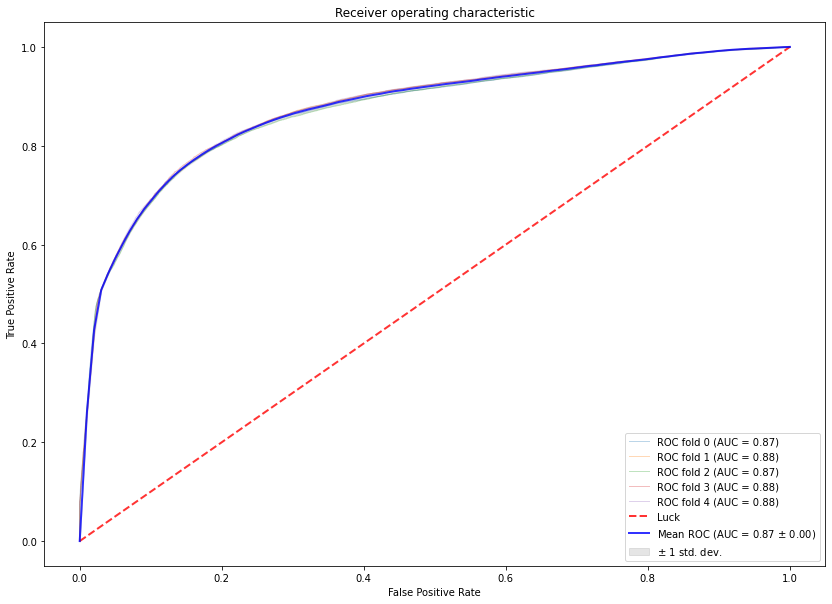

,AUC Train,AUC Test
0,0.883886,0.872218
1,0.883513,0.875225
2,0.884343,0.871038
3,0.883191,0.875807
4,0.883237,0.875983


In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X_train, Y), range(5)):
    cat_model.fit(X_train.iloc[train], Y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

AUC Train	AUC Test
0	0.883487	0.872177
1	0.883180	0.875235
2	0.883725	0.871143
3	0.882806	0.875805
4	0.882638	0.875834

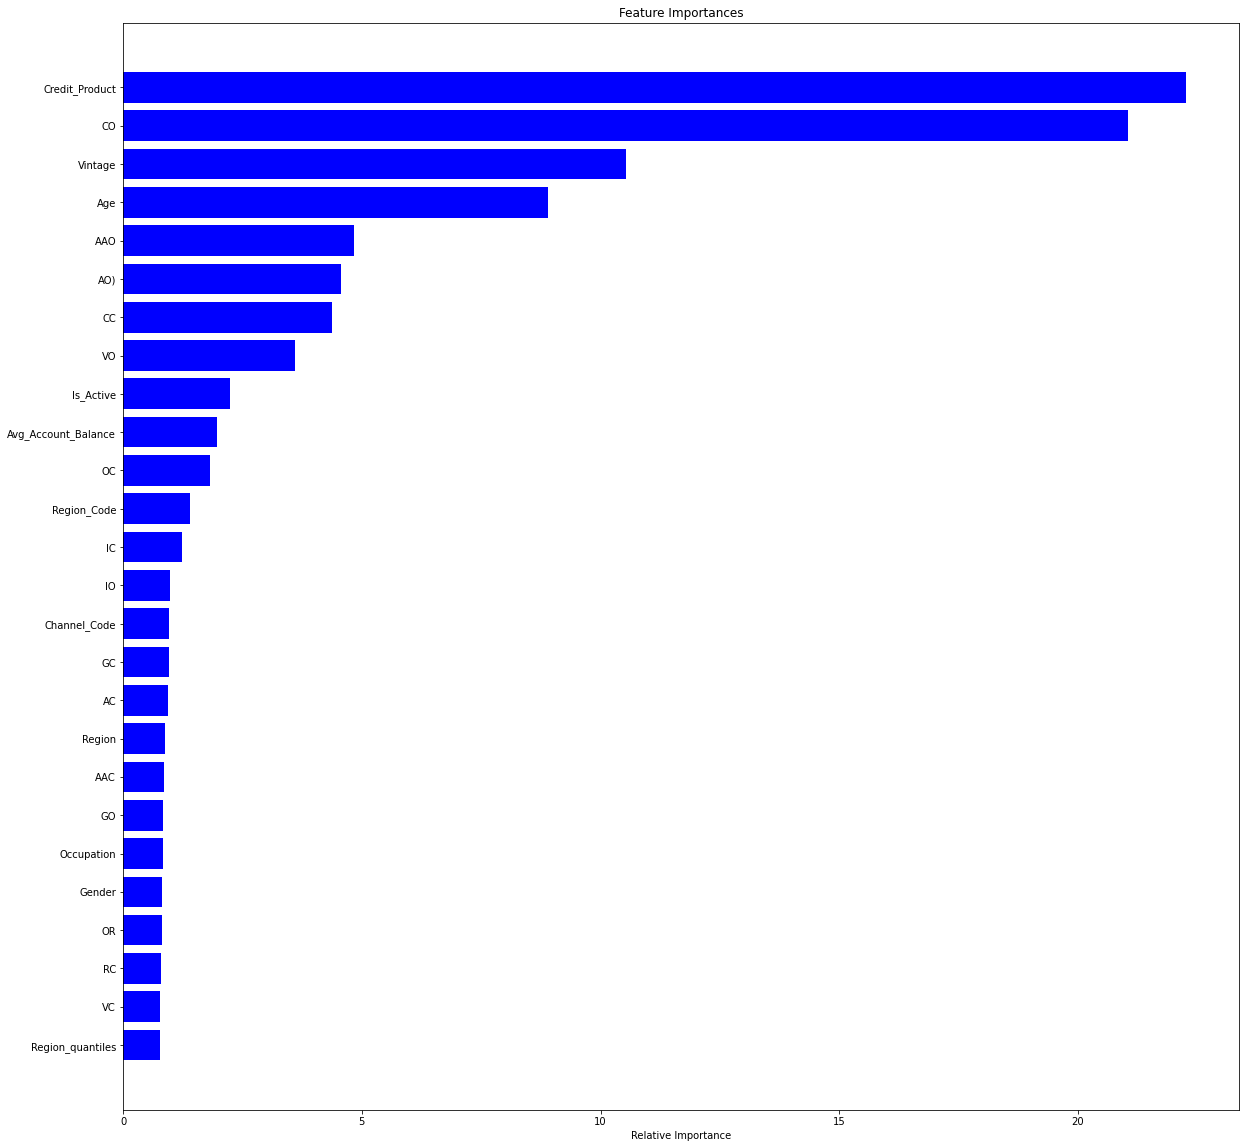

In [59]:
features = [f for f in X_train.columns]

from matplotlib import pyplot

importances = cat_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
sorted_feature_importance = pd.DataFrame(sorted_feature_importance, columns = ['imp','Feature'])

result = sorted_feature_importance.loc[sorted_feature_importance['imp'] >= .1]['Feature']
result

X_train = X_train[result]

In [63]:
y_pred=cat_model.predict_proba(X_test)[:,1]

In [64]:
sub_df['Is_Lead']=y_pred
sub_df.loc[sub_df['Occupation']=="Entrepreneur", "Is_Lead"] = 1
sub_df.loc[sub_df['Is_Lead']> .90, "Is_Lead"] = 1
sub_df.loc[sub_df['Is_Lead'] < .10, "Is_Lead"] = 0
sub_df.loc[sub_df['Occupation']=="Entrepreneur", "Is_Lead"] = 1
sub_df.to_csv("Is_Lead_c13.csv",columns=['ID','Is_Lead'],index=False)
sub_df.to_csv("Sub_Full_b.csv",index=False)

y_pred_lgb =model.predict_proba(ScaledTX_pt)[:,1]


y_pred_cat =cat_model.predict_proba(ScaledTX_pt)[:,1]


y_pred_rf =clf.predict_proba(X_Tenc)[:,1]

y_pred_xgb =XG_model_X1.predict_proba(X_Tenc)[:,1]

y_pred = (y_pred_lgb + y_pred_cat)/2

sub_df['Is_Lead']=y_pred_rf
sub_df.loc[sub_df['Occupation']=="Entrepreneur", "Is_Lead"] = 1
sub_df.to_csv("Is_Lead_b11.csv",columns=['ID','Is_Lead'],index=False)
sub_df.to_csv("Sub_Full.csv",index=False)

import pprint
from time import time

# Reporting util for different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start, 
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))    
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import roc_auc_score

roc_auc = make_scorer(roc_auc_score, greater_is_better=True, needs_threshold=True)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

clf_cat = CatBoostClassifier(thread_count=2,
                         loss_function='Logloss',                        
                         verbose= False
                        )

from skopt.space import Real, Categorical, Integer

# Defining your search space
search_spaces = {'n_estimators': Integer(10, 1000),
                 'depth': Integer(1, 9),
                 'learning_rate': Real(0.01, 1.0, 'log-uniform'),
                 'random_strength': Real(1e-9, 10, 'log-uniform'),
                 'bagging_temperature': Real(0.0, 1.0),
                 'border_count': Integer(1, 255),
                 'l2_leaf_reg': Integer(2, 30),
                 'scale_pos_weight':Real(0.01, 1.0, 'uniform')}

from skopt import BayesSearchCV

# Setting up BayesSearchCV
opt = BayesSearchCV(clf_cat,
                    search_spaces,
                    scoring=roc_auc,
                    cv=skf,
                    n_iter=100,
                    n_jobs=1,  # use just 1 job with CatBoost in order to avoid segmentation fault
                    return_train_score=False,
                    refit=True,
                    optimizer_kwargs={'base_estimator': 'GP'},
                    random_state=42)

from skopt.callbacks import DeadlineStopper, VerboseCallback, DeltaXStopper

best_params = report_perf(opt, X_enc, Y,'CatBoost', 
                          callbacks=[VerboseCallback(100), 
                                      DeadlineStopper(60*10)])

best_params={'bagging_temperature': 0.8373883555532844,
 'border_count': 225,
 'depth': 5,
 'n_estimators': 1200,
 'l2_leaf_reg': 29,
 'learning_rate': 0.015348793493196706,
 'random_strength': 2.415935763457928e-08,
 'scale_pos_weight': 0.36005152365213394}

best_params

tuned_cat_model = CatBoostClassifier(**best_params)